# Data Augumentation
Training deep-learning models with more diverse data-set implies towards its accuracy. It prevents model from being over-fit. Augmentation multiplies the data-set by applying few transformation techniques like random crop, flip, Normalise, Resizing, Padding.

<p align="center"><img src="https://live.staticflickr.com/65535/49135954821_9a0c878231_d.jpg" width="600"></p>



In [0]:
!pip install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html

In [0]:
pip install opencv-python==4.1.1.26

In [0]:
import torch
import PIL
import cv2
import torchvision.transforms.functional as tf
import matplotlib.pyplot as plt

In [0]:
def imshow(img, title):
    plt.title(title)
    plt.imshow(img)
    plt.show()
    return

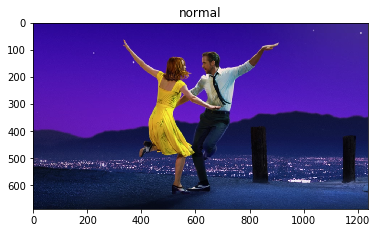

In [4]:
img = PIL.Image.open('img_3.png')
imshow(img, 'normal')

## brightness factor
brightness_factor (float) – How much to adjust the brightness. Can be any non negative number. 0 gives a black image, 1 gives the original image while 2 increases the brightness by a factor of 2.

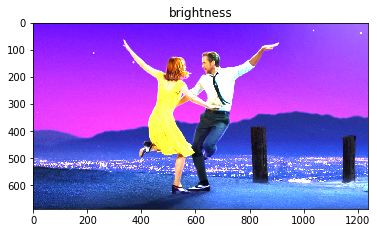

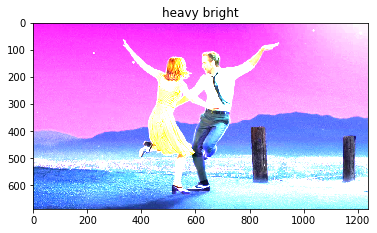

In [0]:
img_1 = tf.adjust_brightness(img, brightness_factor = 2.5)

im = tf.adjust_brightness(img, brightness_factor = 5.76)

imshow(img_1,'brightness')
imshow(im , 'heavy bright')

## Resize
If size is a sequence like
            (h, w), the output size will be matched to this. If size is an int,
            the smaller edge of the image will be matched to this number maintaing
            the aspect ratio.

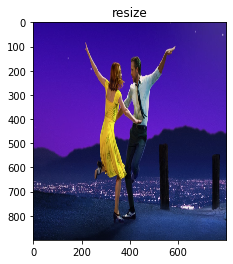

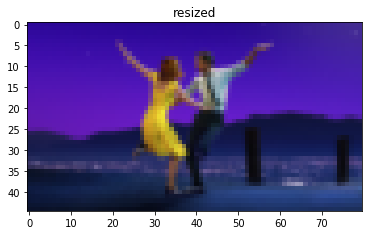

In [0]:
img_2 = tf.resize(img,(900,800))
im_r = tf.resize(img, 45)
imshow(img_2,'resize')
imshow(im_r, 'resized')

## resized_crop

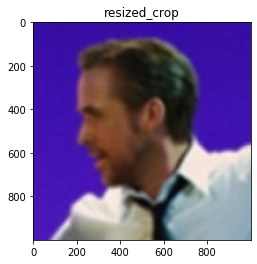

In [0]:
img_3 = tf.resized_crop(img,100,600,120,120,1000)
imshow(img_3,'resized_crop')

## Rotate

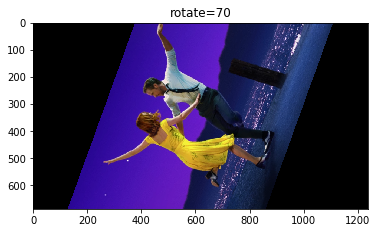

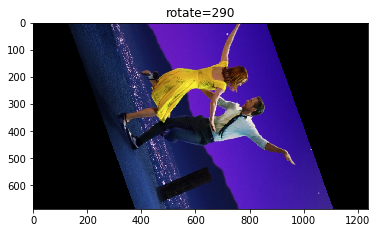

In [0]:
img_4 = tf.rotate(img, angle=70)
im_h = tf.rotate(img, angle=290)
imshow(img_4, 'rotate=70')
imshow(im_h, 'rotate=290')

## horizontal flip

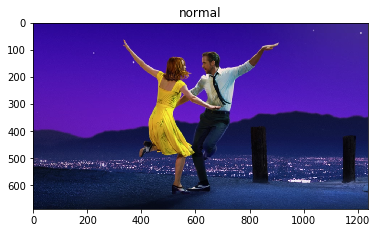

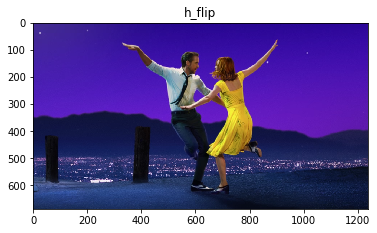

In [0]:
img_5 = tf.hflip(img)
imshow(img,'normal')
imshow(img_5, 'h_flip')

## padding

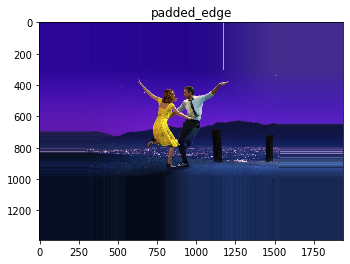

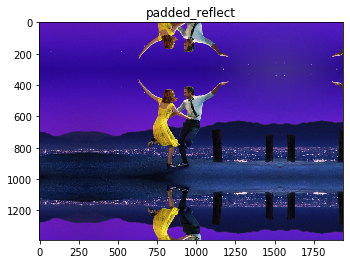

In [0]:
img_6 = tf.pad(img,(300,300,400,400),(255,107,10), padding_mode='edge')
img_10 = tf.pad(img, (300,300,400,400),padding_mode='reflect')
imshow(img_6, 'padded_edge')
imshow(img_10, 'padded_reflect')

## vflip

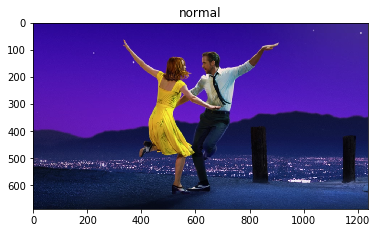

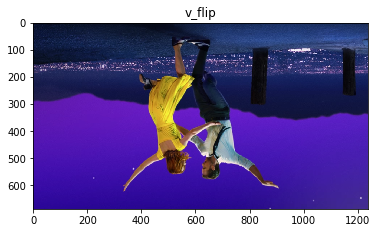

In [0]:
img_7 = tf.vflip(img)
imshow(img,'normal')
imshow(img_7,'v_flip')

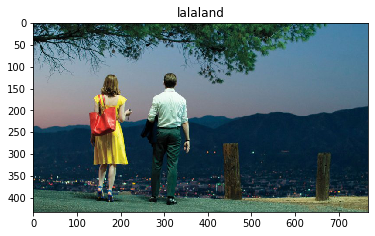

In [5]:
image = PIL.Image.open('img_1.jpg')
imshow(image, 'lalaland')

## gray_scale sconversion

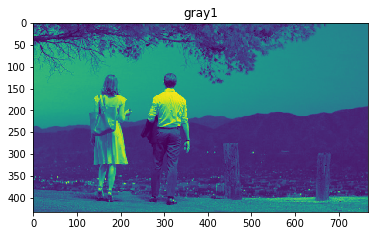

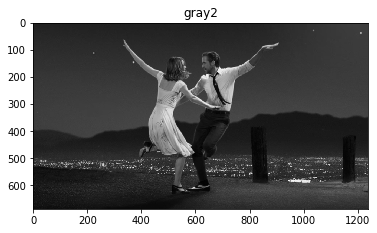

In [0]:
'''if num_output_channels = 1 : returned image is single channel

if num_output_channels = 3 : returned image is 3 channel with r = g = b'''

img_8 = tf.to_grayscale(img,3)
img_9 = tf.to_grayscale(image,1) 
imshow(img_9, 'gray1')
imshow(img_8, 'gray2')

## contrast
contrast_factor (float) – How much to adjust the contrast. Can be any non negative number. 0 gives a solid gray image, 1 gives the original image while 2 increases the contrast by a factor of 2.

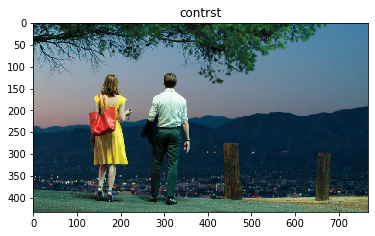

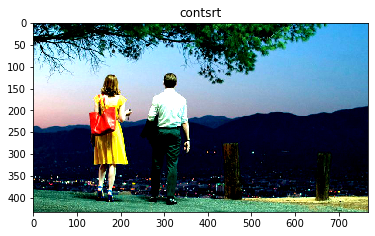

In [0]:
img_11 = tf.adjust_contrast(image, contrast_factor=1)
img_12 = tf.adjust_contrast(image, contrast_factor=2)
imshow(img_11,'contrst')
imshow(img_12, 'contsrt')

## gama correction
gamma (float) – Non negative real number, same as \gammaγ in the equation. gamma larger than 1 make the shadows darker, while gamma smaller than 1 make dark regions lighter.

gain (float) – The constant multiplier.

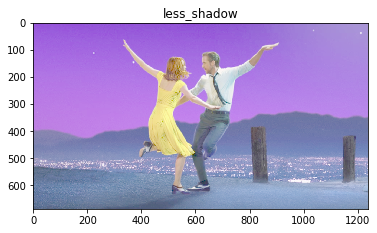

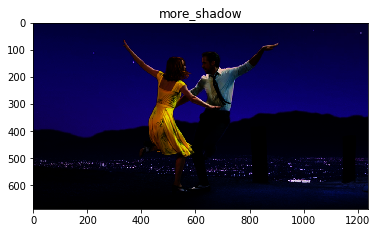

In [0]:
img_13 = tf.adjust_gamma(img, gamma = 0.3, gain=1)
img_14 = tf.adjust_gamma(img, gamma = 3, gain=1)
imshow(img_13,'less_shadow')
imshow(img_14,'more_shadow')



## hue
hue_factor (float) – How much to shift the hue channel. Should be in [-0.5, 0.5]. 0.5 and -0.5 give complete reversal of hue channel in HSV space in positive and negative direction respectively. 0 means no shift. Therefore, both -0.5 and 0.5 will give an image with complementary colors while 0 gives the original image.

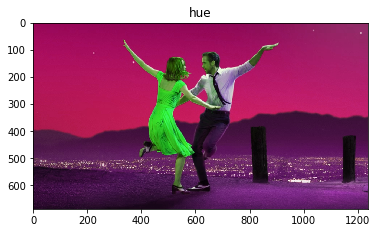

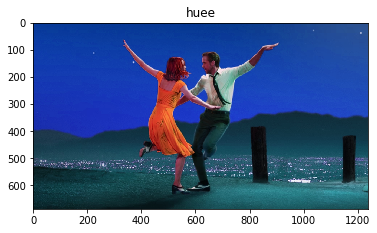

In [0]:
img_15 = tf.adjust_hue(img,hue_factor=0.2)
img_16 = tf.adjust_hue(img, hue_factor=-0.1)
imshow(img_15, 'hue')
imshow(img_16, 'huee')




## saturation
saturation_factor (float) – How much to adjust the saturation. 0 will give a black and white image, 1 will give the original image while 2 will enhance the saturation by a factor of 2.


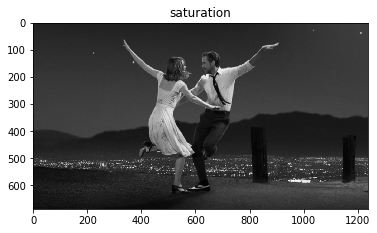

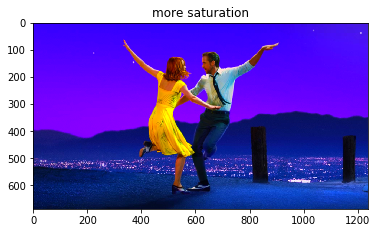

In [0]:
img_17 = tf.adjust_saturation(img,saturation_factor=0)
img_18 = tf.adjust_saturation(img, saturation_factor=2)
imshow(img_17,'saturation')
imshow(img_18, 'more saturation')

## affine transformation
  resample (``PIL.Image.NEAREST`` or ``PIL.Image.BILINEAR`` or ``PIL.Image.BICUBIC``, optional):
            An optional resampling filter.
            See `filters`_ for more information.
            If omitted, or if the image has mode "1" or "P", it is set to ``PIL.Image.NEAREST``.
        fillcolor (int): Optional fill color for the area outside the transform in the output image.

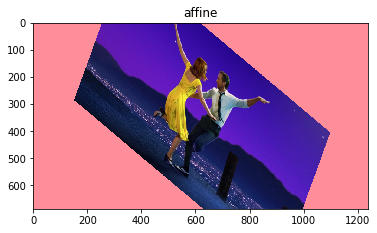

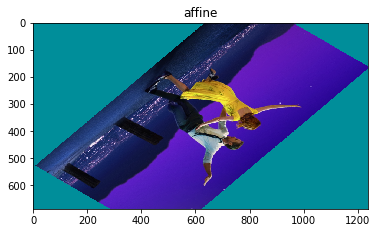

In [0]:
img_19 = tf.affine(img,angle=40, translate=(6,3), scale=0.8,
                shear=-20, resample=PIL.Image.BICUBIC, fillcolor=(256,142,154))

img_20 = tf.affine(img,angle=140, translate=(6,3), scale=0.8,
                shear=-20, resample=PIL.Image.NEAREST, fillcolor=(0,142,154))
imshow(img_19, 'affine')
imshow(img_20, 'affine')

## normalise
Normalize a tensor image with mean and standard deviation.
    Given mean: ``(M1,...,Mn)`` and std: ``(S1,..,Sn)`` for ``n`` channels, this transform
    will normalize each channel of the input ``torch.*Tensor`` i.e.
    ``input[channel] = (input[channel] - mean[channel]) / std[channel]``

note::
        This transform acts out of place, i.e., it does not mutates the input tensor.

    Args:
        tensor : input tensor image
        mean (sequence): Sequence of means for each channel.
        std (sequence): Sequence of standard deviations for each channel.
        inplace(bool,optional): Bool to make this operation in-place.

In [0]:
#convert PIL image to tensor
tensor = tf.to_tensor(img)

In [0]:
#normalize the tensor image
normalize = tf.normalize(tensor,(0.485, 0.456, 0.406), (0.229, 0.224, 0.225))

In [0]:
#conversion back to PIL image from tensors and normalized
t2PIL = tf.to_pil_image(tensor)
N2PIL = tf.to_pil_image(normalize)


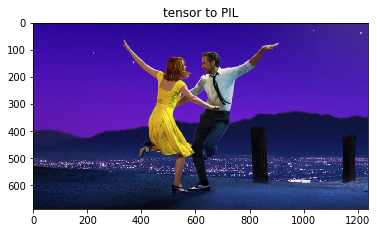

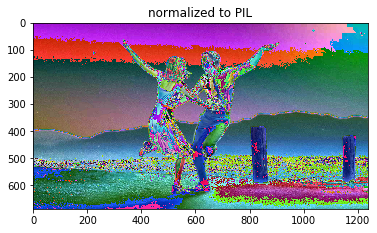

In [22]:
imshow(t2PIL,'tensor to PIL')
imshow(N2PIL, 'normalized to PIL')